<a href="https://colab.research.google.com/github/RJAbuNasser/Final-Project/blob/main/Final_Project_Girls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Improting Libraries**

In [2]:
import zipfile
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro

**Core Work**

Entering xlsx file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10.xlsx
Sheet: Sheet1
Shapiro-Wilk Normality Check Test:
Statistic: 1.000, p-value: 1.000
At 0.050 significance level: p-value = 1.000 > 0.05, data looks normally distributed


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


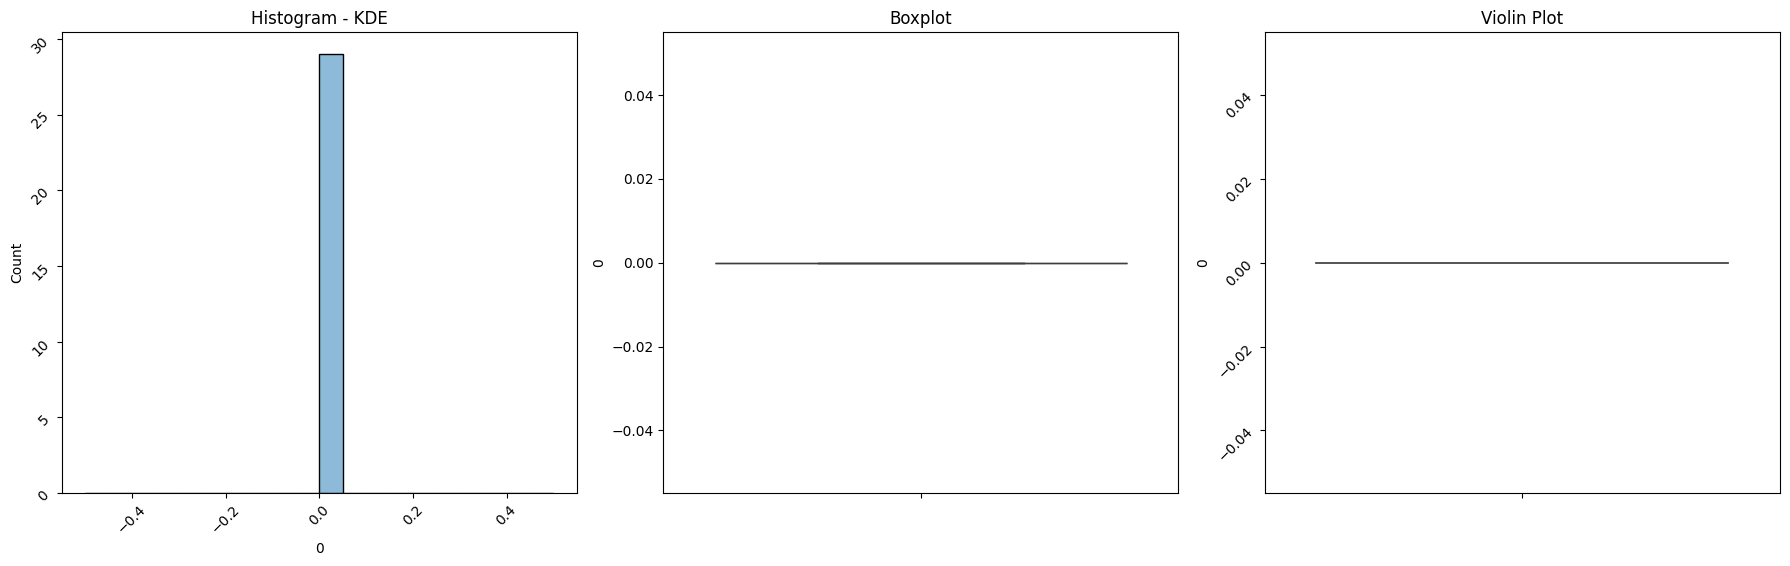

Sheet: Sheet2
Shapiro-Wilk Normality Check Test:
Statistic: 0.184, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


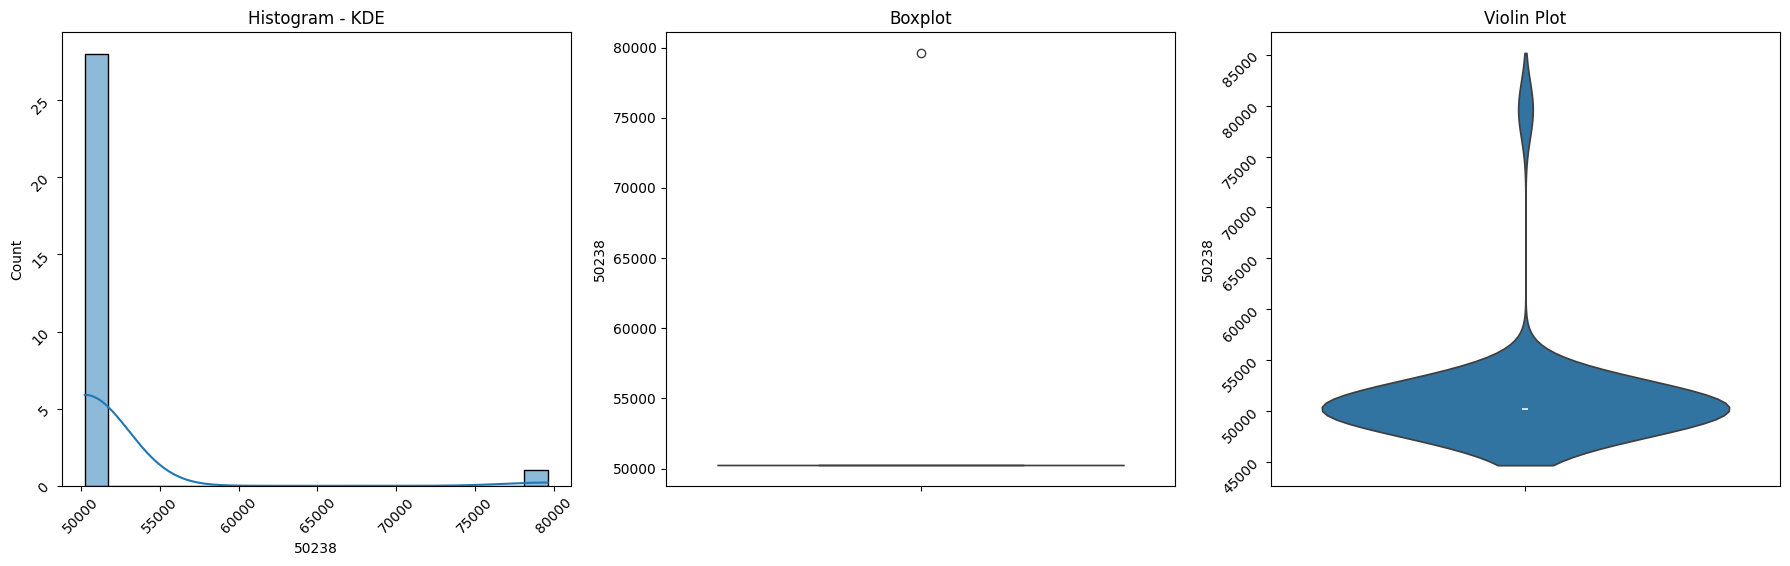

Entering txt file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10_10.txt
Shapiro-Wilk Normality Check Test:
Statistic: 0.429, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


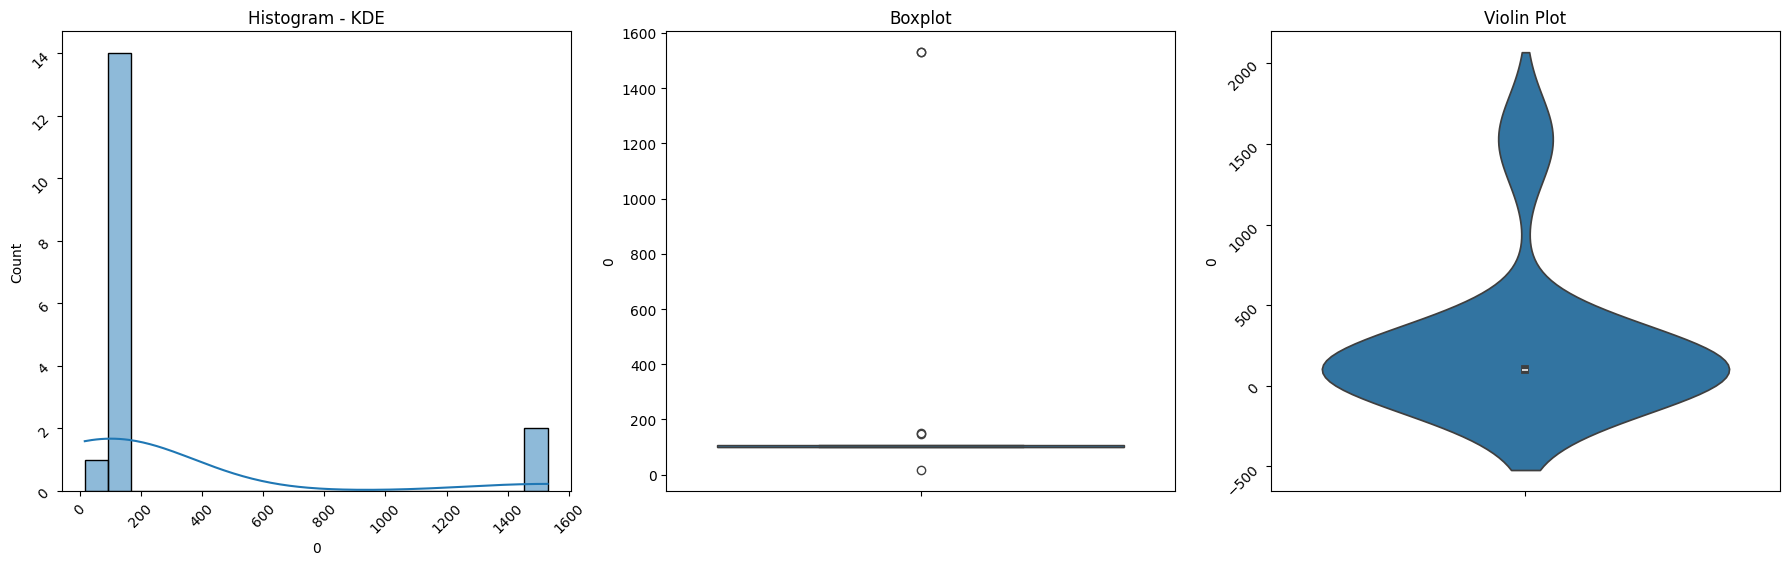

Entering xlsx file: Data-All Algos/CEC0969/969-Results/10-D/Co-PPSO_10_full.xlsx
Sheet: Sheet1
Shapiro-Wilk Normality Check Test:
Statistic: 0.688, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


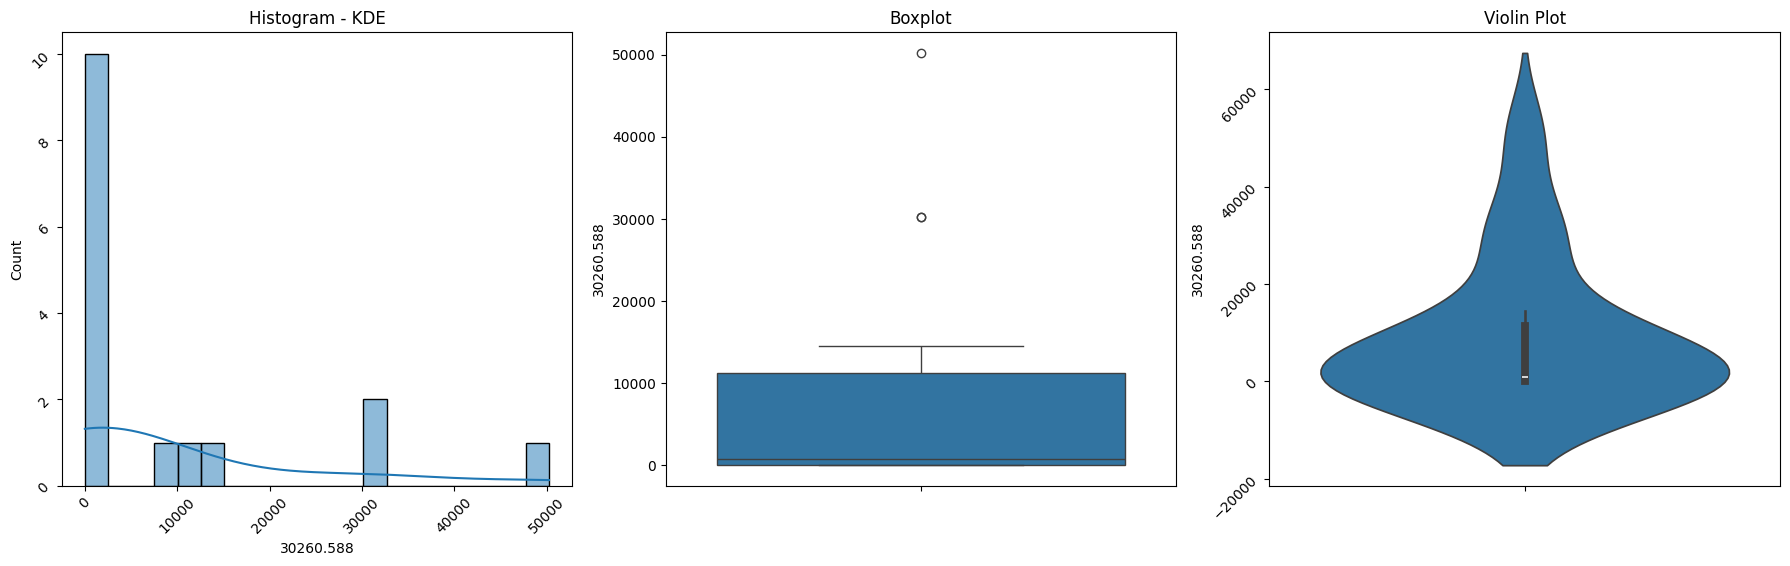

Sheet: Sheet2
Shapiro-Wilk Normality Check Test:
Statistic: 0.277, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


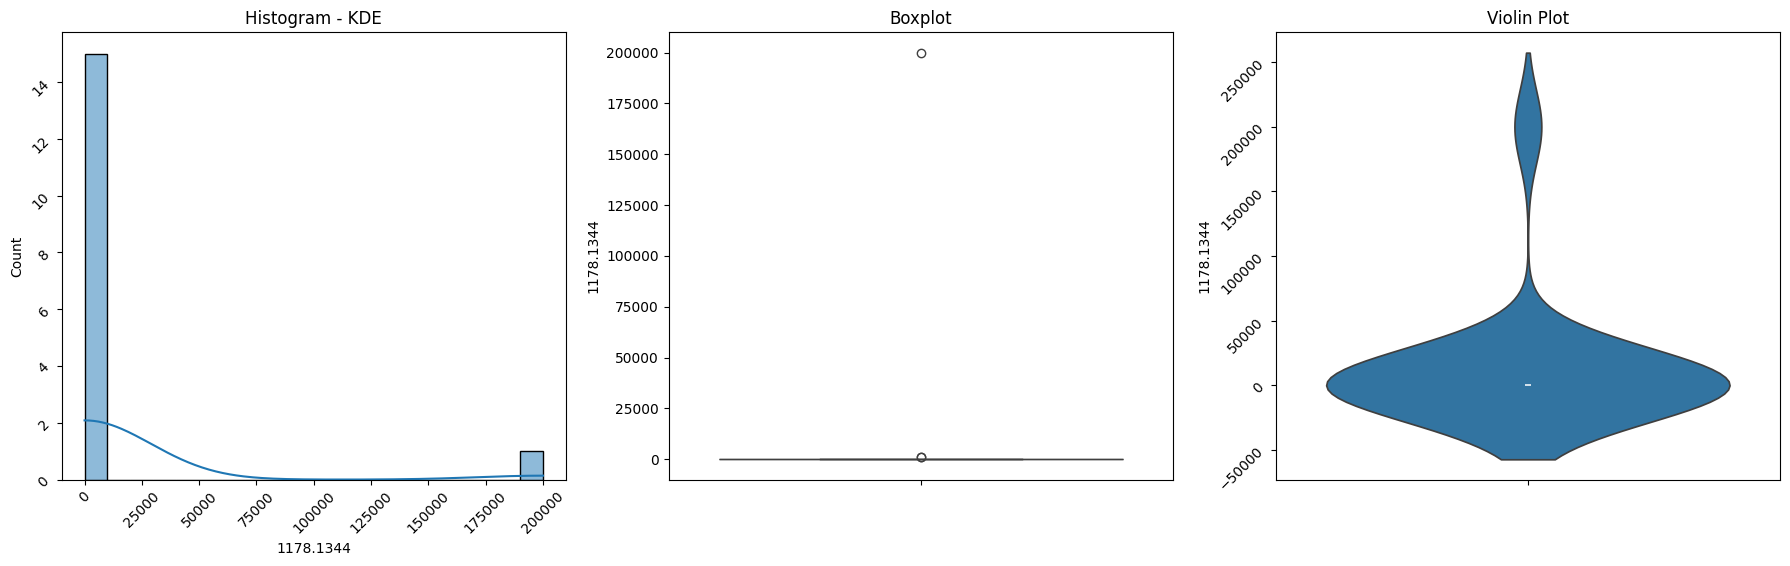

Sheet: Sheet3
Shapiro-Wilk Normality Check Test:
Statistic: 0.274, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


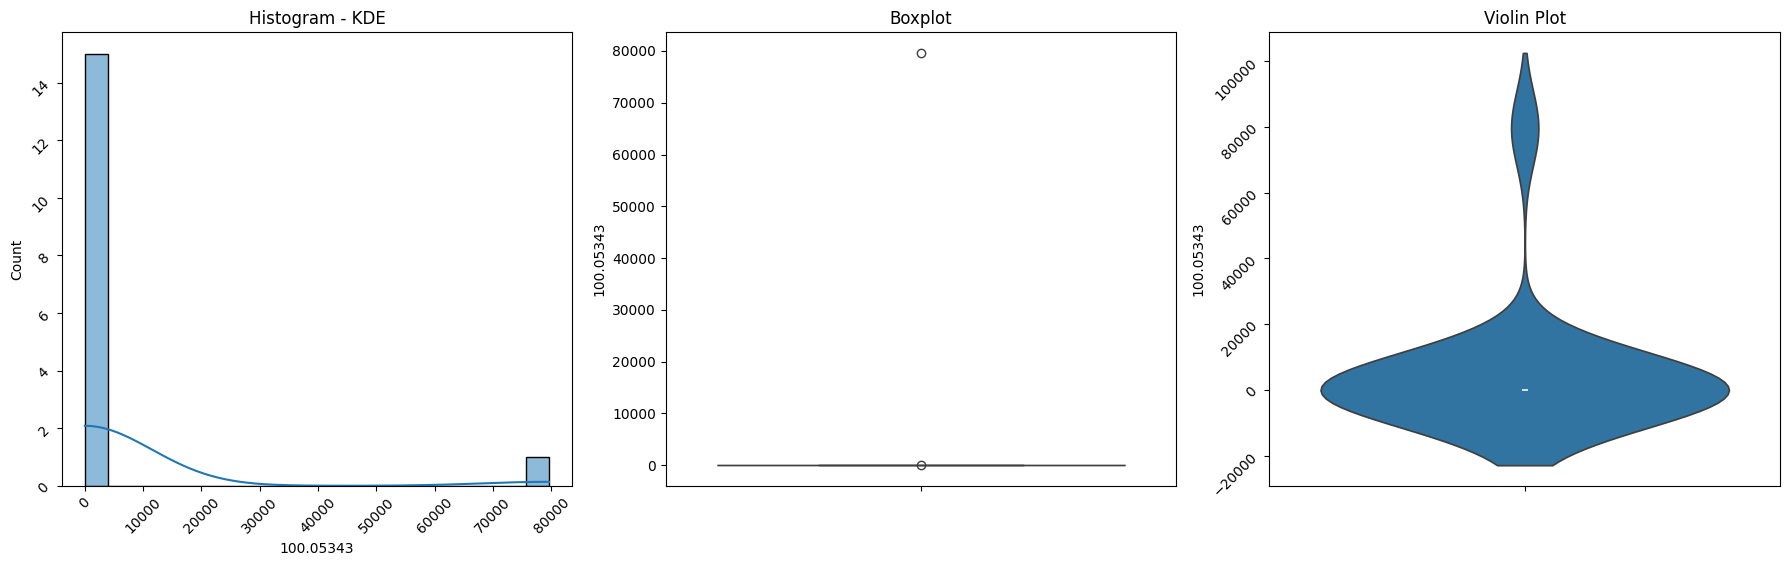

Sheet: Sheet4
Shapiro-Wilk Normality Check Test:
Statistic: 0.273, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


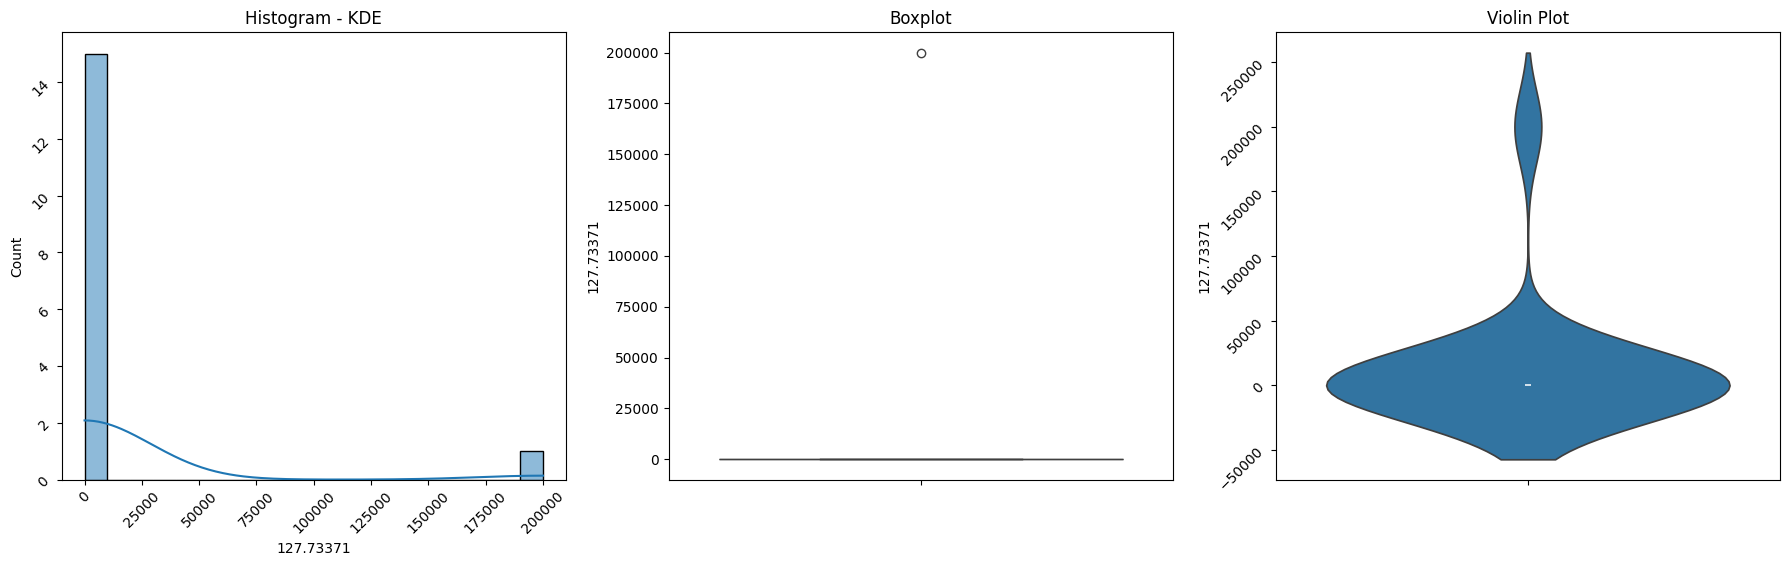

Sheet: Sheet5
Shapiro-Wilk Normality Check Test:
Statistic: 0.359, p-value: 0.000
At 0.050 significance level: p-value = 0.000 <= 0.05, data does not look normally distributed


KeyboardInterrupt: 

In [3]:
def plot_data(data):
    data = pd.to_numeric(data, errors='coerce')
    data = data.dropna()
    result = shapiro(data)
    alpha = 0.05
    print("Shapiro-Wilk Normality Check Test:")
    print(f"Statistic: {result.statistic:.3f}, p-value: {result.pvalue:.3f}")
    if result.pvalue > alpha:
        print(f"At {alpha:.3f} significance level: p-value = {result.pvalue:.3f} > {alpha}, data looks normally distributed")
    else:
        print(f"At {alpha:.3f} significance level: p-value = {result.pvalue:.3f} <= {alpha}, data does not look normally distributed")

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    sns.histplot(data, bins=20, kde=True, ax=axs[0])
    axs[0].set_title('Histogram - KDE')
    axs[0].tick_params(axis='x', labelrotation=45)
    axs[0].tick_params(axis='y', labelrotation=45)

    sns.boxplot(data=data, ax=axs[1])
    axs[1].set_title('Boxplot')
    axs[1].tick_params(axis='x', labelrotation=45)

    sns.violinplot(data=data, ax=axs[2])
    axs[2].set_title('Violin Plot')
    axs[2].tick_params(axis='x', labelrotation=45)
    axs[2].tick_params(axis='y', labelrotation=45)

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

def enter_txt(file):
    lines = file.readlines()
    data = [line.decode('utf-8').strip().replace(',', ' ').split() for line in lines]
    results = pd.DataFrame(data)
    results.iloc[:, 0] = pd.to_numeric(results.iloc[:, 0], errors='coerce')
    plot_data(results.iloc[:, 0])

def enter_xlsx(file):
    df = pd.read_excel(io.BytesIO(file.read()), sheet_name=None)
    for sheet_name, sheet_data in df.items():
        print(f"Sheet: {sheet_name}")
        sheet_data.iloc[:, 0] = pd.to_numeric(sheet_data.iloc[:, 0], errors='coerce')
        plot_data(sheet_data.iloc[:, 0])

def enter_zip(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        for zip_file in zip_ref.namelist():
            if 'Results' in zip_file or '-D' in zip_file:
                folder_name = zip_file.split('/')[0]
                if folder_name.startswith('CEC'):
                    print(f"Entering CEC folder: {folder_name}")
                elif folder_name.startswith('com'):
                    print(f"Entering com folder: {folder_name}")
                elif 'GECCO1' in folder_name:
                    print(f"Entering GECCO1 folder: {folder_name}")
                elif folder_name.startswith('report'):
                    print(f"Entering report folder: {folder_name}")
                if zip_file.endswith('.txt'):
                    print(f"Entering txt file: {zip_file}")
                    with zip_ref.open(zip_file) as file:
                        enter_txt(file)
                elif zip_file.endswith('.xlsx'):
                    print(f"Entering xlsx file: {zip_file}")
                    with zip_ref.open(zip_file) as file:
                        enter_xlsx(file)

enter_zip("Data-All Algos.zip")

**STD & MErr**

In [ ]:
#till we recieve the actual values from Dr. Mostafa

**Normality Check Tests**